In [6]:
# Import all necessary libraries
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier# Step1: Create data set
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.special import expit
from sklearn.metrics import classification_report
from sklearn import datasets  
from sklearn.metrics import accuracy_score 
from IPython.display import Image  
from sklearn.model_selection import ShuffleSplit
from sklearn.externals.six import StringIO  

In [7]:
# Define the number of examples.
N = 1000
# Gerar conjunto da Luas 
x,y =  make_moons(n_samples=10000, noise=0.4, random_state=42)

In [8]:
# conjunto de treinamento de teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

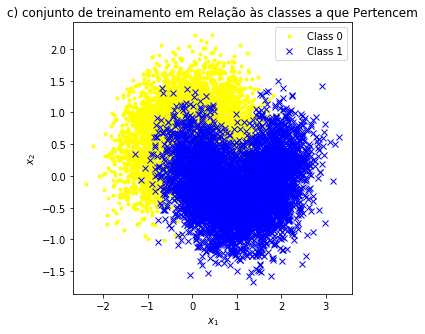

In [11]:
#fig=plt.figure()

idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0', color = 'yellow')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1', color = 'blue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('c) conjunto de treinamento em Relação às classes a que Pertencem')
plt.legend()
plt.show()

In [30]:
# Instantiate LogisticRegression object.
clf = LogisticRegression(solver='lbfgs')

# Train model.
clf.fit(X_train, y_train)

# Use o Grid Search com validação cruzada (tente varios valores para max_leaf_node)
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    2.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

In [31]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=21,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [36]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8648

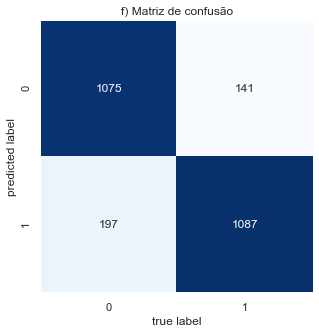

In [140]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('f) Matriz de confusão')
plt.show()

(295, 385)


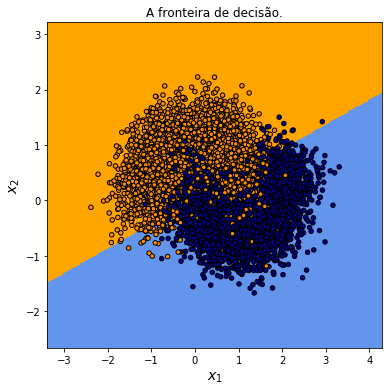

In [33]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(6, 6))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

print(xx.shape)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("A fronteira de decisão.")
plt.savefig('decision_boundary_lr.png', dpi=600)
plt.show()

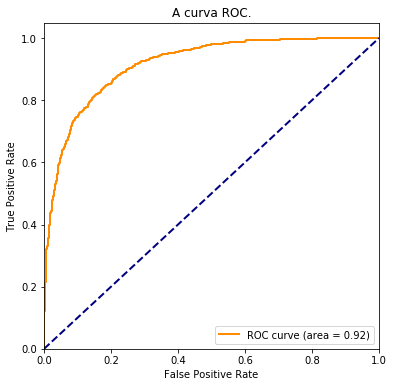

In [34]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(6, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('A curva ROC.')
plt.legend(loc="lower right")

plt.savefig('roc_dt.png', dpi=600)
plt.show()